In [1]:
!pip install japanize_matplotlib

In [1]:
from matplotlib import pyplot as plt
import japanize_matplotlib
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pymc as pm
from scipy.stats import norm, invgamma
import arviz as az

In [2]:
np.random.seed(42)

# 層別の例

In [3]:
mu_1 = 1
mu_2 = 3
mu_3 = 2
sigma2_1 = 0.1
sigma2_2 = 0.2
sigma2_3 = 0.3
x1 = np.random.normal(mu_1, np.sqrt(sigma2_1), 100)
x2 = np.random.normal(mu_2, np.sqrt(sigma2_2), 100)
x3 = np.random.normal(mu_3, np.sqrt(sigma2_3), 100)

In [4]:
print("若年層のデータ:")
print(x1)

若年層のデータ:
[1.15707481 0.95627699 1.2048171  1.48162433 0.9259542  0.92595939
 1.49939094 1.24268417 0.85153916 1.17157255 0.85345446 0.85272332
 1.07651519 0.39496766 0.45453309 0.82218907 0.67971468 1.09937373
 0.71285758 0.55339036 1.46347884 0.92860326 1.02135429 0.54945506
 0.82785107 1.0350768  0.63602387 1.11880615 0.81006137 0.90775834
 0.80972366 1.58574179 0.9957318  0.66552244 1.26011154 0.61393534
 1.06604847 0.38029789 0.57999069 1.06225299 1.23352364 1.05419141
 0.9634288  0.90478265 0.53245029 0.77236527 0.85433323 1.3342914
 1.10866164 0.44247775 1.10248435 0.87822629 0.78593847 1.19342903
 1.32603068 1.29449663 0.73461612 0.90221846 1.10475469 1.30849446
 0.8484718  0.94128948 0.65014616 0.62172625 1.25694323 1.42888075
 0.9772284  1.31734497 1.11435935 0.79599522 1.11428332 1.48636987
 0.98867081 1.49478377 0.17156386 1.25990839 1.0275267  0.90544557
 1.02901731 0.37147552 0.93053365 1.11292891 1.46735113 0.83610857
 0.74433187 0.84133049 1.28947557 1.10396023 0.8324751

In [5]:
print("中年層のデータ")
print(x2)

中年層のデータ
[2.36702696 2.81188169 2.84673341 2.6412107  2.92787084 3.18069704
 3.84352798 3.07807357 3.11518004 2.96670677 2.14189943 2.98814263
 3.02693577 4.10159536 2.91397356 3.13485607 2.98447642 2.47735129
 3.5110859  3.33627468 3.35376024 2.59330957 3.62734869 2.37307315
 3.26245047 3.97960154 2.55701869 2.74674396 3.04456545 2.77483884
 2.30652223 3.03066229 2.52492334 3.21179697 2.58882098 3.69315174
 2.64971848 2.85596971 3.36381596 2.44954074 3.10172318 3.58457201
 2.28111164 3.08257077 3.11622312 3.34964182 2.44681883 2.40947385
 3.23341936 3.13281558 3.11202381 3.15493635 2.6958837  3.10386701
 3.13106599 2.68053233 3.83439973 3.21190452 2.46723288 3.2936197
 2.56410911 3.35199494 3.51813969 2.63297971 3.4308349  3.18460124
 3.36763648 3.84827161 2.8902591  2.66291894 2.60219705 2.63515855
 2.96551907 3.1525678  3.12373989 3.36992759 3.00581462 3.6500402
 2.88164187 4.21649663 3.27980694 2.61666749 2.52108232 3.21576822
 2.9000644  3.31931073 3.2116383  2.96742992 2.62130234 

In [6]:
print("高年層のデータ")
print(x3)

高年層のデータ
[2.19596821 2.30715433 2.5932116  2.57719116 1.24541941 1.48633207
 2.28209643 2.28141216 2.28210324 4.11022795 2.31268961 2.62197492
 2.52252829 2.35678168 1.82731992 2.41570456 1.5767062  1.87028911
 1.73415544 2.04484431 3.26779071 0.97725673 2.37588019 1.11667914
 1.74151227 2.59644281 2.03520762 1.40969487 1.60821202 2.37223102
 1.59996172 2.11855925 2.02496072 1.64310379 3.17428654 2.34721175
 0.89078372 2.10212523 1.63752462 2.46689697 1.56591851 1.93715626
 2.27659292 2.47419365 1.34257058 1.81678613 1.73986174 1.64215684
 2.96697911 2.22181762 1.30938542 2.50273369 3.16235282 2.56550451
 1.1678068  1.73477408 2.69391581 1.61239347 2.24308991 2.42428454
 1.49229927 1.96739662 0.22468476 1.43891978 1.86166273 1.316561
 2.89410849 1.21667931 1.75897771 2.07160956 2.78941789 1.21354591
 2.63709103 2.00560488 1.46240557 2.2531045  2.10902949 1.67124768
 2.03823218 1.78895505 2.06217601 2.36266391 2.86869719 1.32202053
 3.1683105  0.93079748 1.91686388 2.3222346  2.15390558 

In [7]:
# 層別して正規分布のパラメータを推定
mu_1_hat = np.mean(x1)
mu_2_hat = np.mean(x2)
mu_3_hat = np.mean(x3)
sigma2_1_hat = np.var(x1)
sigma2_2_hat = np.var(x2)
sigma2_3_hat = np.var(x3)

print(f'平均1: {mu_1_hat}, 分散1: {sigma2_1_hat}')
print(f'平均2: {mu_2_hat}, 分散2: {sigma2_2_hat}')
print(f'平均3: {mu_3_hat}, 分散3: {sigma2_3_hat}')

平均1: 0.9671608477958371, 分散1: 0.08165221946938583
平均2: 3.009974914570739, 分散2: 0.18007793041802844
平均3: 2.035545141720681, 分散3: 0.34917380260450637


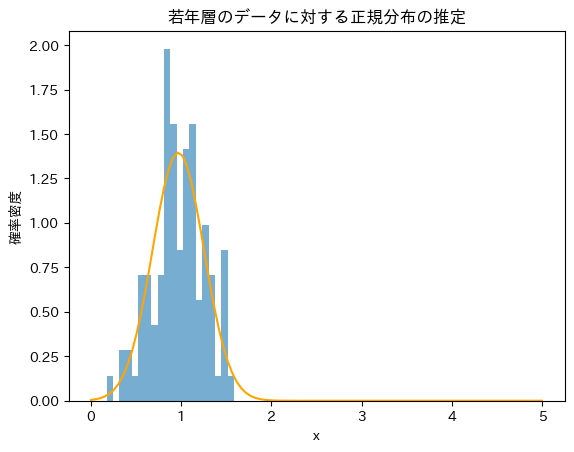

In [8]:
# x1のヒストグラムと推定された確率密度関数を描画
plt.hist(x1, bins=20, density=True, alpha=0.6)
temp = np.linspace(0, 5, 100)
y = stats.norm.pdf(temp, mu_1_hat, np.sqrt(sigma2_1_hat))
plt.plot(temp, y, color='orange')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('若年層のデータに対する正規分布の推定')
plt.show();

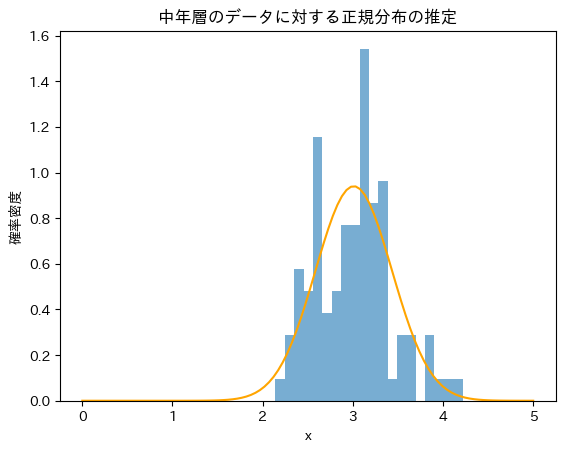

In [9]:
# x2のヒストグラムと推定された確率密度関数を描画
plt.hist(x2, bins=20, density=True, alpha=0.6)
temp = np.linspace(0, 5, 100)
y = stats.norm.pdf(temp, mu_2_hat, np.sqrt(sigma2_2_hat))
plt.plot(temp, y, color='orange')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('中年層のデータに対する正規分布の推定')
plt.show();

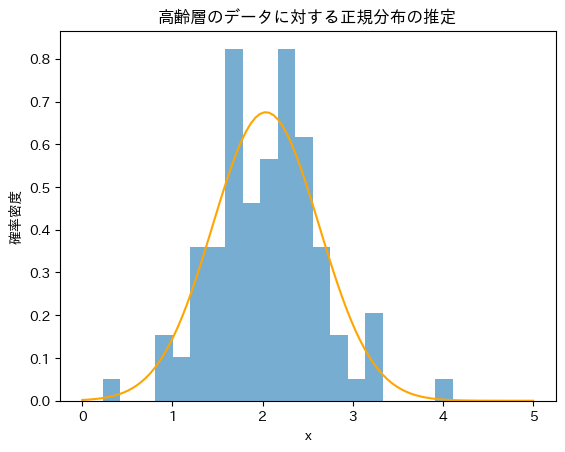

In [10]:
# x3のヒストグラムと推定された確率密度関数を描画
plt.hist(x3, bins=20, density=True, alpha=0.6)
temp = np.linspace(0, 5, 100)
y = stats.norm.pdf(temp, mu_3_hat, np.sqrt(sigma2_3_hat))
plt.plot(temp, y, color='orange')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('高齢層のデータに対する正規分布の推定')
plt.show();

# 単回帰分析

In [11]:
# データの生成
x = np.round(np.random.exponential(5, 100), 1)
y = np.round(1 + 0.2*x +np.random.normal(0, 0.5, 100), 1)

# 最小二乗法でパラメータを推定
alpha_hat = np.cov(x, y)[0, 1] / np.var(x)
beta_hat = np.mean(y) - alpha_hat * np.mean(x)
print(f'α: {alpha_hat}, β: {beta_hat}')

α: 0.19383092044538233, β: 1.0117410574852024


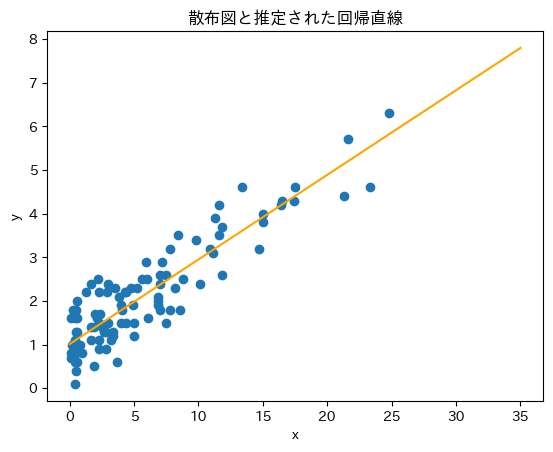

In [12]:
# 散布図と回帰直線を描画
plt.scatter(x, y)
temp = np.linspace(0, 35, 100)
plt.plot(temp, alpha_hat*temp + beta_hat, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('散布図と推定された回帰直線')
plt.show();

# 重回帰分析

In [13]:
# データの生成

x1 = np.round(np.random.exponential(5, 100), 1)
x2 = np.floor(np.abs(100*x1+np.random.normal(0, 10, 100))).astype(int)
y = np.round(1 + 0.1*x1 + 0.03*x2 + np.random.normal(0, 0.1, 100), 1)

df = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'Y': y
})
df

,X1,X2,Y
0,3.6,362,12.2
1,3.8,400,13.3
2,0.6,68,3.1
3,3.0,296,10.1
4,3.8,392,13.1
...,...,...,...
95,7.9,790,25.8
96,1.1,110,4.5
97,0.9,89,3.8
98,0.9,91,3.7


In [14]:
# 重回帰分析
X = df[['X1', 'X2']]
X = sm.add_constant(X)
ols = sm.OLS(y, X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.906e+05
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          9.04e-210
Time:                        18:33:09   Log-Likelihood:                 85.588
No. Observations:                 100   AIC:                            -165.2
Df Residuals:                      97   BIC:                            -157.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9988      0.014     69.271      0.000       0.970       1.027
X1             0.3356      0.102      3.287      0.001       0.133       0.538
X2             0.0276      0.001     26.934      0.000       0.026       0.030
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.320
Skew:                           0.125   Prob(JB):                        0.852
Kurtosis:                       3.120   Cond. No.                     6.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/0x/_j0np00125943j5y58cl1p9r0000gn/T/ipykernel_97740/1080646132.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_y = result.params[0] + result.params[1]*temp1 + result.params[2]*temp2


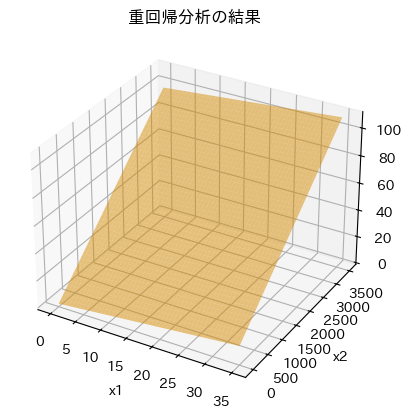

In [15]:
# 重回帰の平面を図示
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
temp1 = np.linspace(0, 35, 100)
temp2 = np.linspace(0, 3500, 100)
temp1, temp2 = np.meshgrid(temp1, temp2)
temp_y = result.params[0] + result.params[1]*temp1 + result.params[2]*temp2
ax.plot_surface(temp1, temp2, temp_y, alpha=0.5, color='orange')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('重回帰分析の結果')
plt.show();

# 重回帰に対するベイズ推論

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, s_e]


Output()

Sampling 2 chains for 2_000 tune and 5_000 draw iterations (4_000 + 10_000 draws total) took 41 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  1.002  0.143   0.731    1.263      0.002    0.002    5960.0   
beta[1]  0.348  1.010  -1.544    2.228      0.015    0.012    4537.0   
beta[2]  0.027  0.010   0.009    0.046      0.000    0.000    4528.0   
sig2_e   1.042  0.151   0.764    1.324      0.002    0.002    5160.0   
sigma    1.018  0.073   0.887    1.162      0.001    0.001    5160.0   
s_e      0.980  0.139   0.725    1.247      0.002    0.002    5160.0   

         ess_tail  r_hat  
beta[0]    4922.0    1.0  
beta[1]    4744.0    1.0  
beta[2]    4715.0    1.0  
sig2_e     4245.0    1.0  
sigma      4245.0    1.0  
s_e        4245.0    1.0  


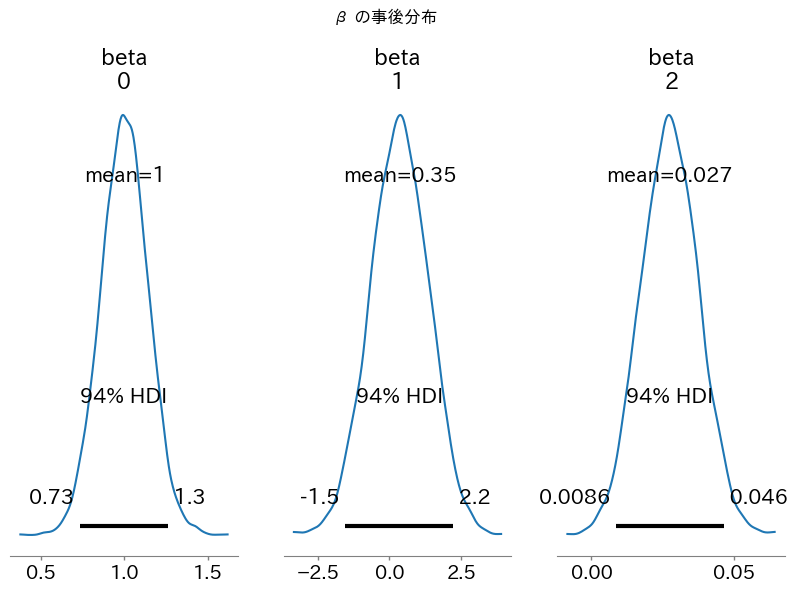

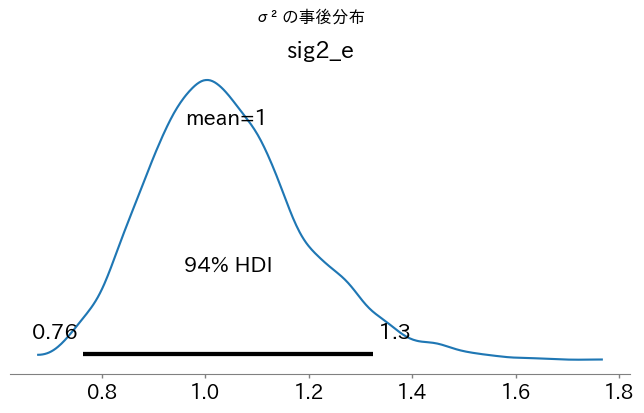

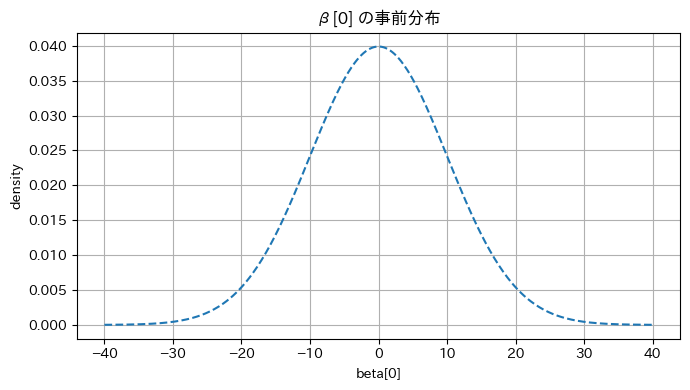

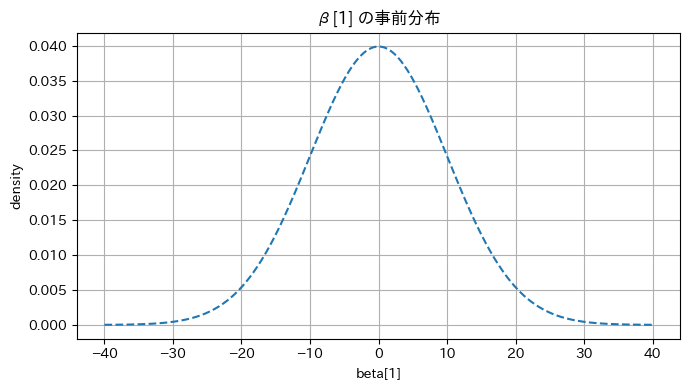

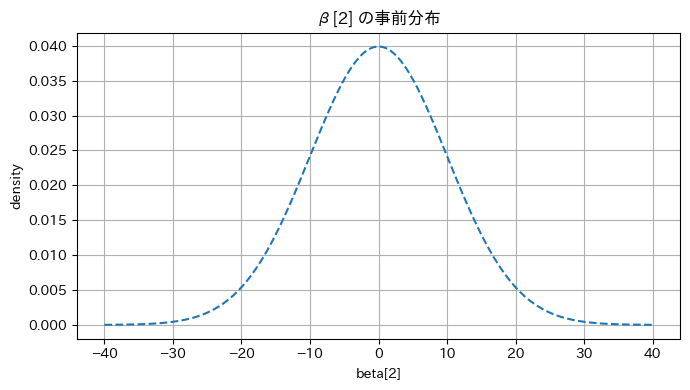

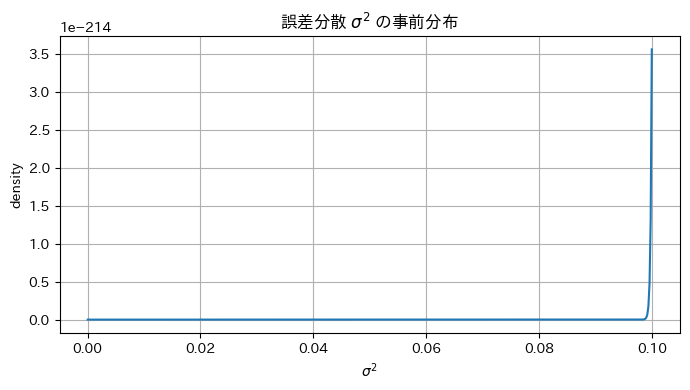

In [16]:
# ======================
# ハイパーパラメータ
# ======================
prior_beta_mean = 0
prior_beta_s = 0.01   # β の precision（精度）→ 分散 = 1 / prior_beta_s
prior_s_e_a = 1       # s_e = 1/σ² の事前 shape
prior_s_e_b = 50      # s_e の事前 rate

# ======================
# データ準備
# ======================
X = sm.add_constant(df[['X1', 'X2']])
y = df['Y'].values
n, p = X.shape

# ======================
# PyMC モデル定義 & サンプリング
# ======================
with pm.Model() as model:
    beta = pm.MvNormal(
        "beta",
        mu=np.full(p, prior_beta_mean),
        cov=np.eye(p) / prior_beta_s
    )

    s_e = pm.Gamma("s_e", alpha=prior_s_e_a, beta=prior_s_e_b)

    sig2_e = pm.Deterministic("sig2_e", 1.0 / s_e)
    sigma = pm.Deterministic("sigma", pm.math.sqrt(sig2_e))

    mu = pm.math.dot(X, beta)

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    idata = pm.sample(
        draws=5000,
        tune=2000,
        chains=2,
        random_seed=0,
        return_inferencedata=True,
    )

print(az.summary(idata, var_names=["beta", "sig2_e", "sigma", "s_e"]))

# ======================
# 事後分布
# ======================
az.plot_posterior(idata, var_names=["beta"], figsize=(10, 6))
plt.suptitle("β の事後分布", y=1.02)
plt.show()

az.plot_posterior(idata, var_names=["sig2_e"], figsize=(8, 4))
plt.suptitle("σ² の事後分布", y=1.02)
plt.show()

# ======================
# 事前分布の描画
# ======================

# ---- β の事前分布（各成分） ----
prior_beta_std = np.sqrt(1 / prior_beta_s)

for j in range(p):
    xs = np.linspace(-4 * prior_beta_std, 4 * prior_beta_std, 500)
    prior_pdf = norm.pdf(xs, loc=prior_beta_mean, scale=prior_beta_std)

    plt.figure(figsize=(7, 4))
    plt.plot(xs, prior_pdf, label="事前", linestyle="--")
    plt.xlabel(f"beta[{j}]")
    plt.ylabel("density")
    plt.title(f"β[{j}] の事前分布")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---- σ² の事前分布（逆ガンマ分布） ----
# σ² = 1/s_e,  s_e ~ Gamma(a, b) → σ² ~ InvGamma(a, scale=b)
xs = np.linspace(1e-5, 0.1, 500)
prior_sig2_pdf = invgamma.pdf(xs, a=prior_s_e_a, scale=prior_s_e_b)

plt.figure(figsize=(7, 4))
plt.plot(xs, prior_sig2_pdf, label="事前 (InvGamma)")
plt.xlabel(r"$\sigma^2$")
plt.ylabel("density")
plt.title(r"誤差分散 $\sigma^2$ の事前分布")
plt.grid(True)
plt.tight_layout()
plt.show()


# 層別+単回帰

In [17]:
# データの生成
beta_0_1 = 0.5
beta_0_2 = 1.5
beta_0_3 = 1
beta_1_1 = 0.1
beta_1_2 = 0.2
beta_1_3 = 0.15

x = np.round(np.random.exponential(5, 300), 1)

y1 = beta_0_1 + beta_1_1*x[0:100] + np.random.normal(0, 0.1, 100)
y2 = beta_0_2 + beta_1_2*x[100:200] + np.random.normal(0, 0.3, 100)
y3 = beta_0_3 + beta_1_3*x[200:300] + np.random.normal(0, 0.2, 100)

In [18]:
# x[0:100]とy1の単回帰分析
alpha_hat_1 = np.cov(x[0:100], y1)[0, 1] / np.var(x[0:100])
beta_hat_1 = np.mean(y1) - alpha_hat_1 * np.mean(x[0:100])
print(f'α1: {alpha_hat_1}, β1: {beta_hat_1}')

α1: 0.10385775074095085, β1: 0.4895320439853069


In [19]:
# x[100:200]とy2の単回帰分析
alpha_hat_2 = np.cov(x[100:200], y2)[0, 1] / np.var(x[100:200])
beta_hat_2 = np.mean(y2) - alpha_hat_2 * np.mean(x[100:200])
print(f'α2: {alpha_hat_2}, β2: {beta_hat_2}')

α2: 0.20607985954643632, β2: 1.5174998586480042


In [20]:
# x[200:300]とy3の単回帰分析
alpha_hat_3 = np.cov(x[200:300], y3)[0, 1] / np.var(x[200:300])
beta_hat_3 = np.mean(y3) - alpha_hat_3 * np.mean(x[200:300])
print(f'α3: {alpha_hat_3}, β3: {beta_hat_3}')

α3: 0.15432252846821576, β3: 0.9811485790329691


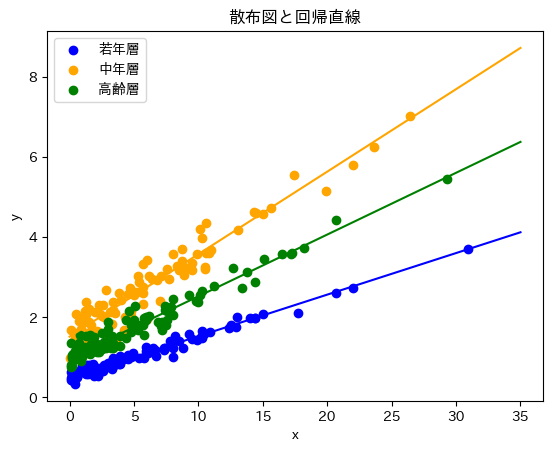

In [30]:
# 散布図と回帰直線を描画
plt.scatter(x[0:100], y1, color='blue', label='若年層')
plt.scatter(x[100:200], y2, color='orange', label='中年層')
plt.scatter(x[200:300], y3, color='green', label='高齢層')
temp = np.linspace(0, 35, 100)
plt.plot(temp, alpha_hat_1*temp + beta_hat_1, color='blue')
plt.plot(temp, alpha_hat_2*temp + beta_hat_2, color='orange')
plt.plot(temp, alpha_hat_3*temp + beta_hat_3, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('散布図と回帰直線')
plt.legend()
plt.show();

# ダミー変数+単回帰

In [31]:
# x1のダミー変数を作成
x1 = np.zeros(300)
x1[100:200] = 1
x2 = np.zeros(300)
x2[200:300] = 1

# ダミー変数を使った重回帰分析
X = np.stack([x, x1, x2], axis=1)
X = np.hstack([np.ones((300, 1)), X])
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ np.hstack([y1, y2, y3])
print(f'β: {beta_hat}')

β: [0.22431351 0.15294502 1.60232483 0.76400223]


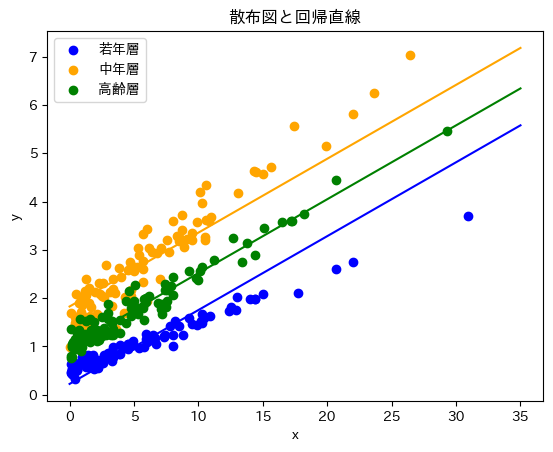

In [32]:
# 散布図と回帰直線を描画
plt.scatter(x[0:100], y1, color='blue', label='若年層')
plt.scatter(x[100:200], y2, color='orange', label='中年層')
plt.scatter(x[200:300], y3, color='green', label='高齢層')
temp = np.linspace(0, 35, 100)
plt.plot(temp, beta_hat[0] + beta_hat[1]*temp, color='blue')
plt.plot(temp, beta_hat[0] + beta_hat[2] + beta_hat[1]*temp, color='orange')
plt.plot(temp, beta_hat[0] + beta_hat[3] + beta_hat[1]*temp, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('散布図と回帰直線')
plt.legend()
plt.show();

# ロジスティック回帰分析

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

beta_0 = 0.5
beta_1_1 = -1
beta_1_2 = -2
beta_2 = 1

p_y = sigmoid(beta_0 + beta_1_1*x1 + beta_1_2*x2+beta_2*x)
y = np.random.binomial(1, p_y, 300)

In [34]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰
model = LogisticRegression(penalty=None)
model.fit(X, y)
model.coef_

array([[ 0.25613242,  1.18574357, -1.07297501, -2.84939349]])

In [35]:
beta_hat[0] = model.coef_[0, 0]
beta_hat[1] = model.coef_[0, 1]
beta_hat[2] = model.coef_[0, 2]
beta_hat[3] = model.coef_[0, 3]

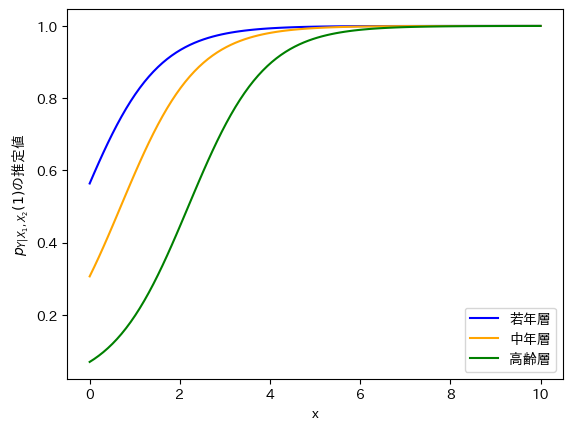

In [36]:
x_plot = np.linspace(0, 10, 100)
p_y_0 = sigmoid(beta_hat[0]+beta_hat[1]*x_plot)
p_y_1 = sigmoid(beta_hat[0]+beta_hat[2]+beta_hat[1]*x_plot)
p_y_2 = sigmoid(beta_hat[0]+beta_hat[3]+beta_hat[1]*x_plot)

plt.plot(x_plot, p_y_0, color='blue', label='若年層')
plt.plot(x_plot, p_y_1, color='orange', label='中年層')
plt.plot(x_plot, p_y_2, color='green', label='高齢層')
plt.xlabel('x')
plt.ylabel(r'$p_{Y|X_{1}, X_{2}}(1)$の推定値')
plt.legend()

# ロジスティック回帰に対するベイズ推論

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta0, beta_x, beta_x1, beta_x2]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
There were 5313 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0    0.610  0.432  -0.164    1.468      0.013    0.009    1155.0   
beta_x   1.037  0.101   0.850    1.182      0.003    0.002    1256.0   
beta_x1 -0.953  0.567  -2.036    0.086      0.017    0.012    1066.0   
beta_x2 -2.639  0.524  -3.645   -1.671      0.016    0.009    1135.0   

         ess_tail  r_hat  
beta0      1685.0    1.0  
beta_x     2075.0    1.0  
beta_x1    1354.0    1.0  
beta_x2    1464.0    1.0  


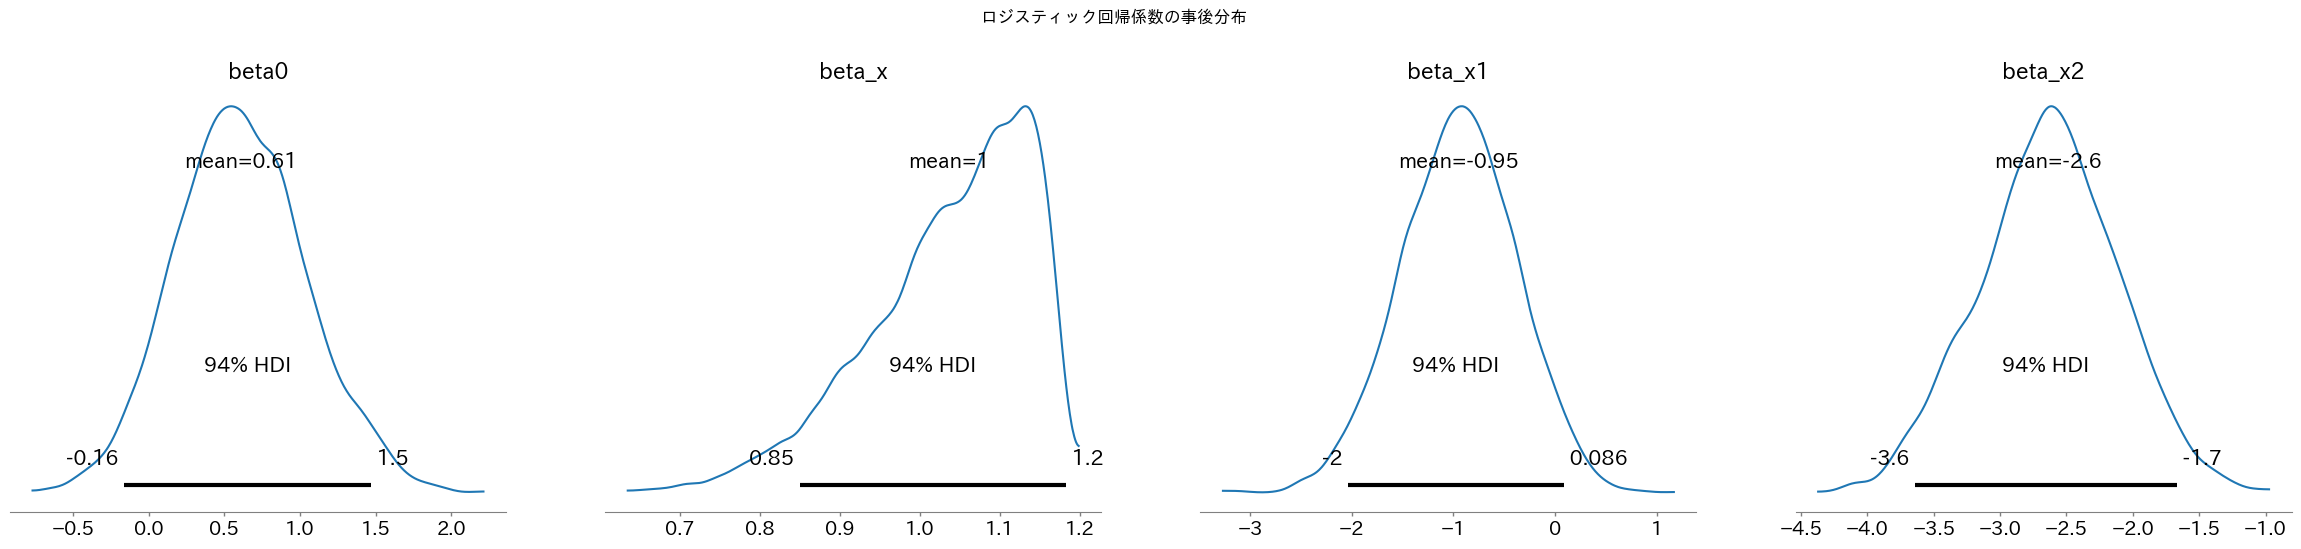

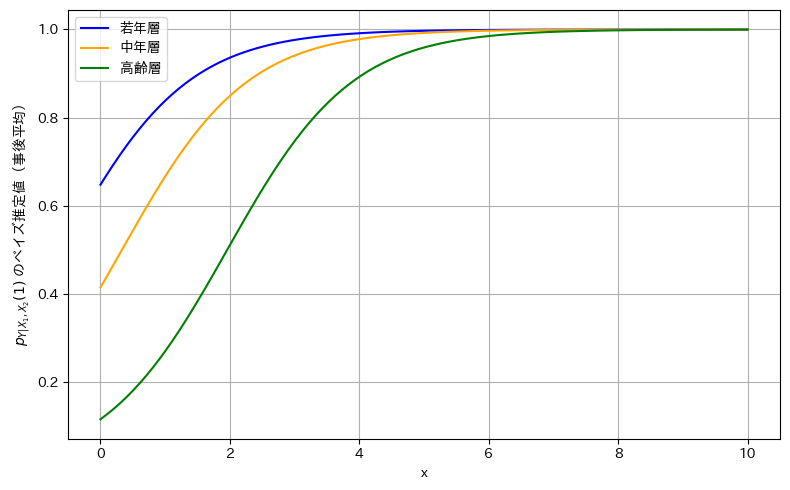

In [37]:
# ======================================================
# 2. PyMC によるベイズロジスティック回帰
#    η = β0 + β1 * x + β2 * x1 + β3 * x2
# ======================================================

with pm.Model() as model:
    # 弱情報的な事前分布（Normal(0, 5)）
    beta0 = pm.Normal("beta0", mu=0, sigma=5)
    beta_x = pm.Normal("beta_x", mu=0, sigma=5)
    beta_x1 = pm.Normal("beta_x1", mu=0, sigma=5)
    beta_x2 = pm.Normal("beta_x2", mu=0, sigma=5)

    # 線形予測子
    eta = beta0 + beta_x * x + beta_x1 * x1 + beta_x2 * x2

    # ロジスティック変換
    p = pm.Deterministic("p", pm.math.sigmoid(eta))

    # 尤度：y ~ Bernoulli(p)
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)

    # サンプリング
    idata = pm.sample(
        draws=4000,
        tune=2000,
        chains=2,
        random_seed=0,
        return_inferencedata=True,
    )

# 係数の要約
print(az.summary(idata, var_names=["beta0", "beta_x", "beta_x1", "beta_x2"]))

# ======================================================
# 3. 事後分布のプロット
# ======================================================

az.plot_posterior(idata, var_names=["beta0", "beta_x", "beta_x1", "beta_x2"])
plt.suptitle("ロジスティック回帰係数の事後分布", y=1.02)
plt.show()

# ======================================================
# 4. 事後平均の係数を使って、若年層・中年層・高齢層の曲線を描画
# ======================================================

# 事後平均（chain, draw で平均）
beta0_hat = idata.posterior["beta0"].mean(dim=("chain", "draw")).values
beta_x_hat = idata.posterior["beta_x"].mean(dim=("chain", "draw")).values
beta_x1_hat = idata.posterior["beta_x1"].mean(dim=("chain", "draw")).values
beta_x2_hat = idata.posterior["beta_x2"].mean(dim=("chain", "draw")).values

# x のグリッド
x_plot = np.linspace(0, 10, 100)

# 若年層: x1 = 0, x2 = 0
p_y_0 = sigmoid(beta0_hat + beta_x_hat * x_plot)

# 中年層: x1 = 1, x2 = 0
p_y_1 = sigmoid(beta0_hat + beta_x1_hat + beta_x_hat * x_plot)

# 高齢層: x1 = 0, x2 = 1
p_y_2 = sigmoid(beta0_hat + beta_x2_hat + beta_x_hat * x_plot)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, p_y_0, label='若年層', color='blue')
plt.plot(x_plot, p_y_1, label='中年層', color='orange')
plt.plot(x_plot, p_y_2, label='高齢層', color='green')
plt.xlabel('x')
plt.ylabel(r'$p_{Y|X_{1}, X_{2}}(1)$ のベイズ推定値（事後平均）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
